#### Basic ANN

In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [2]:
#Importing Data
dataset = loadtxt('pima-indians-diabetes.data.csv',delimiter=',')

In [4]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [26]:
#Split it into (X) and output (y) variables 
X = dataset[:, 0:8]
y = dataset[:,8]

In [27]:
#Build single layer neural network
model = Sequential()

#Add Layer
model.add(Dense(8, input_dim = 8, activation = 'linear'))#input layer should not be taken as the count for number of hidden layer

model.add(Dense(8, activation = 'relu')) #Hidden layer

model.add(Dense(1, activation = 'sigmoid')) #Output layer

In [28]:
#Compile model
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')


In [29]:
#Fit the model
model.fit(X, y, epochs = 30, batch_size = 10)

Epoch 1/30
77/77 [==============================] - 1s 1ms/step - loss: 12.7564 - accuracy: 0.3547
Epoch 2/30
77/77 [==============================] - 0s 2ms/step - loss: 1.3470 - accuracy: 0.4201
Epoch 3/30
77/77 [==============================] - 0s 1ms/step - loss: 1.0393 - accuracy: 0.4937
Epoch 4/30
77/77 [==============================] - 0s 2ms/step - loss: 0.9169 - accuracy: 0.5295
Epoch 5/30
77/77 [==============================] - 0s 2ms/step - loss: 0.9018 - accuracy: 0.5619
Epoch 6/30
77/77 [==============================] - 0s 1ms/step - loss: 0.8222 - accuracy: 0.6169
Epoch 7/30
77/77 [==============================] - 0s 1ms/step - loss: 0.7810 - accuracy: 0.6193
Epoch 8/30
77/77 [==============================] - 0s 1ms/step - loss: 0.7141 - accuracy: 0.6483
Epoch 9/30
77/77 [==============================] - 0s 1ms/step - loss: 0.7049 - accuracy: 0.6247
Epoch 10/30
77/77 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.6709
Epoch 11/30
77/77 

<AxesSubplot:>

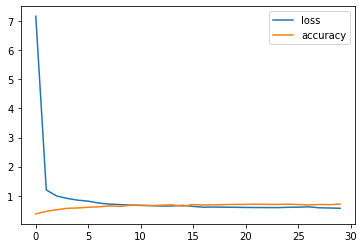

In [30]:
pd.DataFrame(model.history.history).plot()

In [31]:
_,accuracy = model.evaluate(X,y)
print("Accuracy: %.2f" % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.7083
Accuracy: 70.83


In [32]:
#Make probalitiy predictions with the model 
predictions = model.predict(X)
#round your predictions 
round_ = [round(x[0]) for x in predictions]

In [33]:
#Make the model predict classes 
predictions = model.predict_classes(X)

/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
for i in range(5):
  print("%s ------> %d (expected %d)" % (X[i].tolist(),predictions[i],y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] ------> 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] ------> 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] ------> 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] ------> 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] ------> 1 (expected 1)
